<a href="https://colab.research.google.com/github/rayan-arya/rayan-arya/blob/main/CS97finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from matplotlib import pyplot
import itertools

%matplotlib inline

import random



#importing various libraries that we may use later on

## 1) Import the data from google sheets/kaggle and print the first 10 rows of the data frame


In [ ]:
#importing the data file
import pandas as pd

def load_health_data(health_path):
    return pd.read_csv(health_path, on_bad_lines='skip')



In [ ]:
#diplaying the first 5 rows of the data set in a table

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

health = gc.open('CVD_cleaned').sheet1

# get_all_values gives a list of rows.
rows = health.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
health = pd.DataFrame.from_records(rows)
health.columns = health.iloc[0]
health.drop(0, axis=0, inplace=True)
health.head(10)

###2) Analyze the data

In [ ]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 1 to 308854
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   General_Health                308854 non-null  object
 1   Checkup                       308854 non-null  object
 2   Exercise                      308854 non-null  object
 3   Heart_Disease                 308854 non-null  object
 4   Skin_Cancer                   308854 non-null  object
 5   Other_Cancer                  308854 non-null  object
 6   Depression                    308854 non-null  object
 7   Diabetes                      308854 non-null  object
 8   Arthritis                     308854 non-null  object
 9   Sex                           308854 non-null  object
 10  Age_Category                  308854 non-null  object
 11  Height_(cm)                   308854 non-null  object
 12  Weight_(kg)                   308854 non-null  object
 13 

In [ ]:
health.iloc[1]

0
General_Health                             Very Good
Checkup                         Within the past year
Exercise                                          No
Heart_Disease                                    Yes
Skin_Cancer                                       No
Other_Cancer                                      No
Depression                                        No
Diabetes                                         Yes
Arthritis                                         No
Sex                                           Female
Age_Category                                   70-74
Height_(cm)                                      165
Weight_(kg)                                    77.11
BMI                                            28.29
Smoking_History                                   No
Alcohol_Consumption                                0
Fruit_Consumption                                 30
Green_Vegetables_Consumption                       0
FriedPotato_Consumption                     

In [ ]:
health.describe()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,99,525,3654,2,31,77,75,69
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,168,90.72,26.63,No,0,30,30,4
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,27119,16614,3340,183590,140262,90273,51162,67833


### 3) Make all the categorical columns into numerical

In [ ]:
health_real = health
#health['General_Health','Checkup', 'Exercise', 'Sex', 'Smoking_History'].astype(int))

health_real['General_Health'] = pd.factorize(health_real['General_Health'])[0]
health_real['Checkup'] = pd.factorize(health_real['Checkup'])[0]
health_real['Exercise'] = pd.factorize(health_real['Exercise'])[0]
health_real['Heart_Disease'] = pd.factorize(health_real['Heart_Disease'])[0]
health_real['Depression'] = pd.factorize(health_real['Depression'])[0]
health_real['Sex'] = pd.factorize(health_real['Sex'])[0]
health_real['Age_Category'] = pd.factorize(health_real['Age_Category'])[0]
health_real['Smoking_History'] = pd.factorize(health_real['Smoking_History'])[0]
health_real['Other_Cancer'] = pd.factorize(health_real['Other_Cancer'])[0]
health_real['Diabetes'] = pd.factorize(health_real['Diabetes'])[0]
health_real['Arthritis'] = pd.factorize(health_real['Arthritis'])[0]
health_real['Skin_Cancer'] = pd.factorize(health_real['Skin_Cancer'])[0]

health_real.head(5)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
1,0,0,0,0,0,0,0,0,0,0,0,150,32.66,14.54,0,0,30,16,12
2,1,1,0,1,0,0,0,1,1,0,0,165,77.11,28.29,1,0,30,0,4
3,1,1,1,0,0,0,0,1,1,0,1,163,88.45,33.47,1,4,12,3,16
4,0,1,1,1,0,0,0,1,1,1,2,180,93.44,28.73,1,0,30,30,8
5,2,1,0,0,0,0,0,0,1,1,3,191,88.45,24.37,0,0,8,4,0


In [ ]:
health_real.dtypes

0
General_Health                   int64
Checkup                          int64
Exercise                         int64
Heart_Disease                    int64
Skin_Cancer                      int64
Other_Cancer                     int64
Depression                       int64
Diabetes                         int64
Arthritis                        int64
Sex                              int64
Age_Category                     int64
Height_(cm)                     object
Weight_(kg)                     object
BMI                             object
Smoking_History                  int64
Alcohol_Consumption             object
Fruit_Consumption               object
Green_Vegetables_Consumption    object
FriedPotato_Consumption         object
dtype: object

In [ ]:
health_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 1 to 308854
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   General_Health                308854 non-null  int64 
 1   Checkup                       308854 non-null  int64 
 2   Exercise                      308854 non-null  int64 
 3   Heart_Disease                 308854 non-null  int64 
 4   Skin_Cancer                   308854 non-null  int64 
 5   Other_Cancer                  308854 non-null  int64 
 6   Depression                    308854 non-null  int64 
 7   Diabetes                      308854 non-null  int64 
 8   Arthritis                     308854 non-null  int64 
 9   Sex                           308854 non-null  int64 
 10  Age_Category                  308854 non-null  int64 
 11  Height_(cm)                   308854 non-null  object
 12  Weight_(kg)                   308854 non-null  object
 13 

In [ ]:
health_real['Height_(cm)'] = health_real['Height_(cm)'].astype('int', copy=True)
health_real['Weight_(kg)'] = health_real['Weight_(kg)'].astype('float', copy=True)
health_real['BMI'] = health_real['BMI'].astype('float', copy=True)
health_real['Alcohol_Consumption'] = health_real['Alcohol_Consumption'].astype('int', copy=True)
health_real['Fruit_Consumption'] = health_real['Fruit_Consumption'].astype('int', copy=True)
health_real['Green_Vegetables_Consumption'] = health_real['Green_Vegetables_Consumption'].astype('int', copy=True)
health_real['FriedPotato_Consumption'] = health_real['FriedPotato_Consumption'].astype('int', copy=True)
health_real.dtypes

0
General_Health                    int64
Checkup                           int64
Exercise                          int64
Heart_Disease                     int64
Skin_Cancer                       int64
Other_Cancer                      int64
Depression                        int64
Diabetes                          int64
Arthritis                         int64
Sex                               int64
Age_Category                      int64
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                   int64
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object

array([[<Axes: title={'center': 'General_Health'}>,
        <Axes: title={'center': 'Checkup'}>,
        <Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Heart_Disease'}>],
       [<Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>,
        <Axes: title={'center': 'Depression'}>,
        <Axes: title={'center': 'Diabetes'}>],
       [<Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Age_Category'}>,
        <Axes: title={'center': 'Height_(cm)'}>],
       [<Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'Smoking_History'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>],
       [<Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>, <Axes: >]],
      dtype=object)

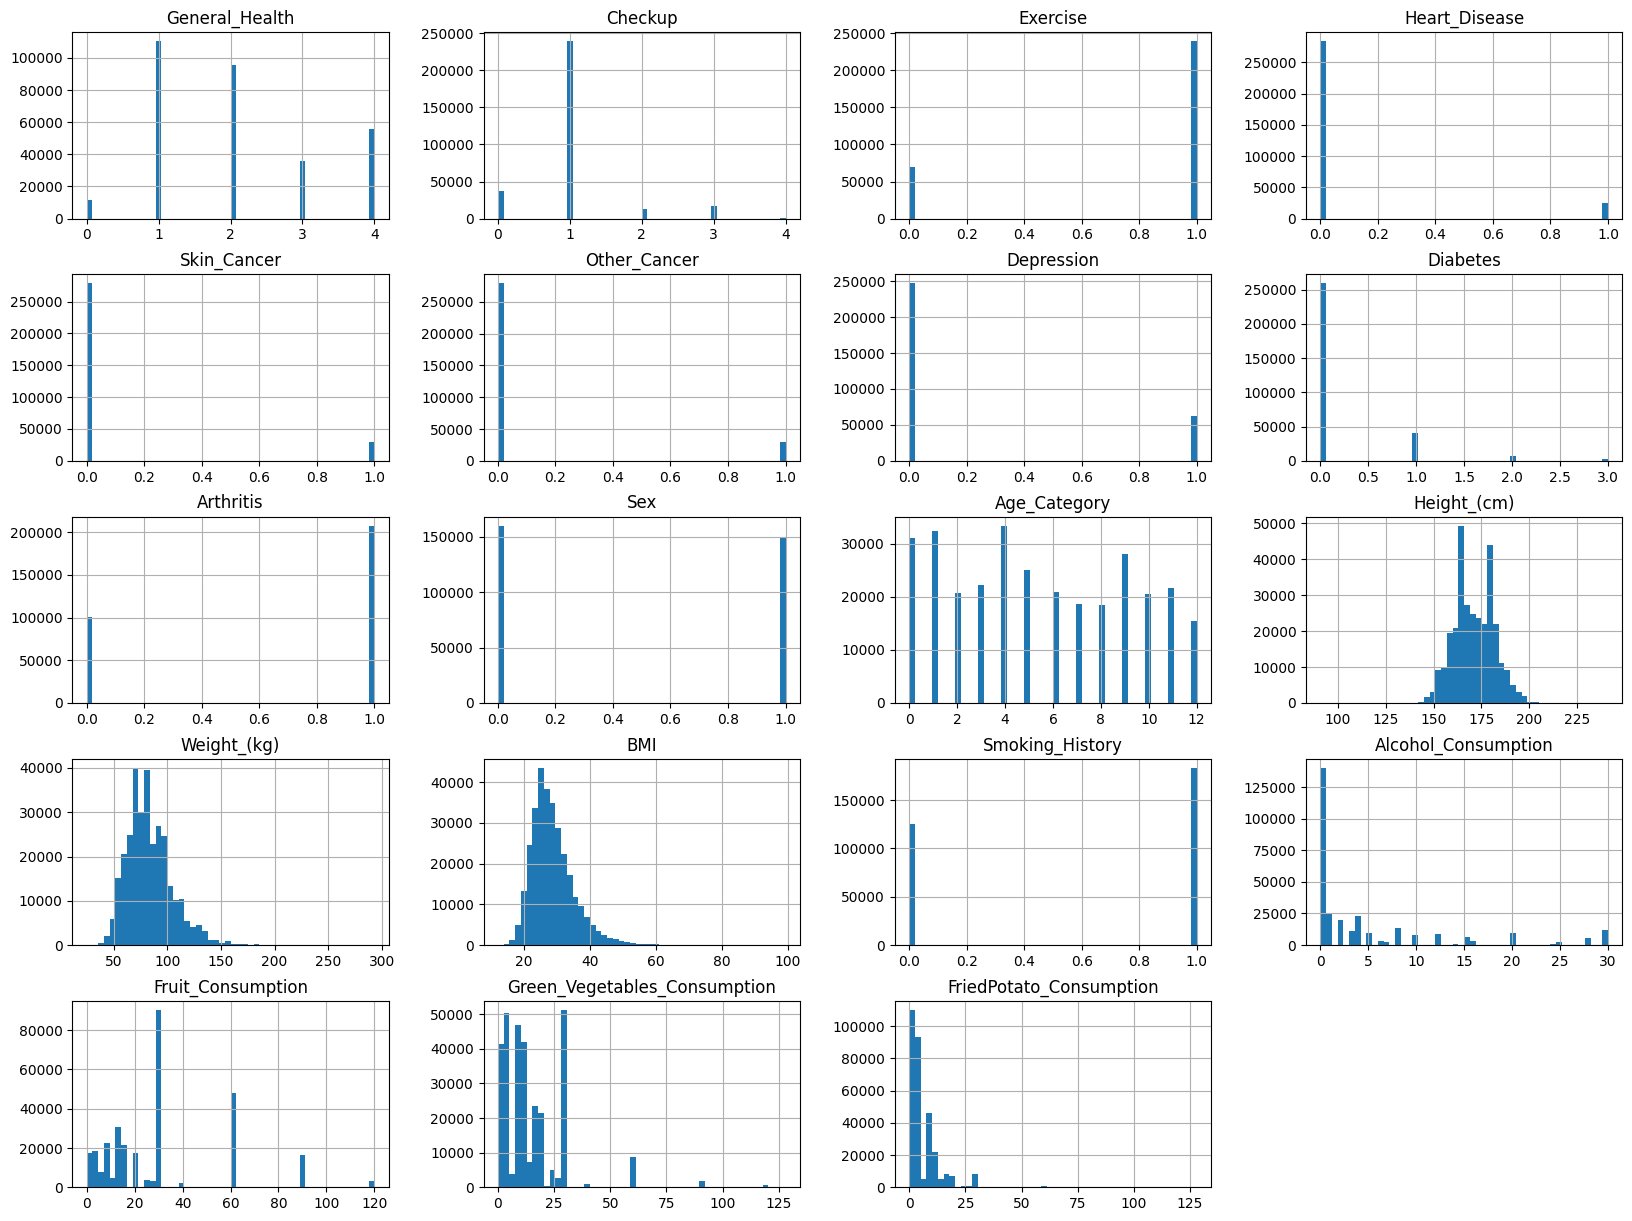

In [ ]:
health_real.hist(bins=50, figsize=(20,15))

### 4) Make two different datasets, one for each axis

In [ ]:
data = health_real.drop('Heart_Disease', axis=1)
labels = health_real['Heart_Disease'].copy()

In [ ]:
from imblearn.over_sampling import SMOTE


rus = SMOTE()
X_resampled, y_resampled = rus.fit_resample(data,labels )

### 5) Create a test, train split

In [ ]:
train, test, target, target_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 30)

### 6) Fit the model (logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter = 10000)

#2
log_reg.fit(train, target)

#3
log_predicted = log_reg.predict(test)

#4
log_score = log_reg.predict_proba(test)[:,1]

### 7) Print the results

In [ ]:
# print the metrics of the model
def print_4_metrics(target_test, predicted):
  print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(target_test,predicted)))
  print("%-12s %f" % ('Precision:', metrics.precision_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('Recall:', metrics.recall_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))
  print("%-12s %f" % ('F1 Score:', metrics.f1_score(target_test, predicted,labels=None, pos_label=1, average='binary', sample_weight=None)))


In [ ]:
from sklearn.metrics import accuracy_score

# accuracy_score(target_test, log_predicted)
print_4_metrics(target_test, log_predicted)

Accuracy:    0.810020
Precision:   0.799822
Recall:      0.825711
F1 Score:    0.812560


In [ ]:
def roc(target, score):
  fpr, tpr, thresholds = metrics.roc_curve(target,score)
  print("Performance Results:\n")
  pyplot.figure(1)
  pyplot.plot(fpr, tpr, color='blue')
  pyplot.title("ROC curve")
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')

  aucroc = metrics.auc(fpr, tpr)
  print('AUC of ROC: ', aucroc)

Performance Results:

AUC of ROC:  0.8893669742133385


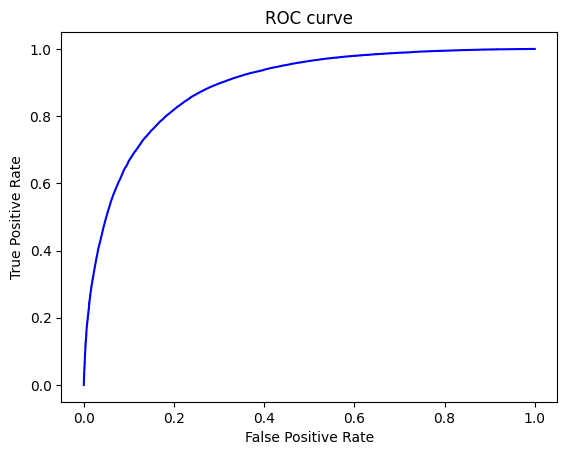

In [ ]:
roc(target_test, log_score)

### XGboost classifier (Decision tree)
---



In [ ]:
!pip install xgboost

Accuracy of XGBoost on test set: 0.83
Accuracy:    0.828461
Precision:   0.812584
Recall:      0.854107
F1 Score:    0.832828
Performance Results:

AUC of ROC:  0.8782046562769176


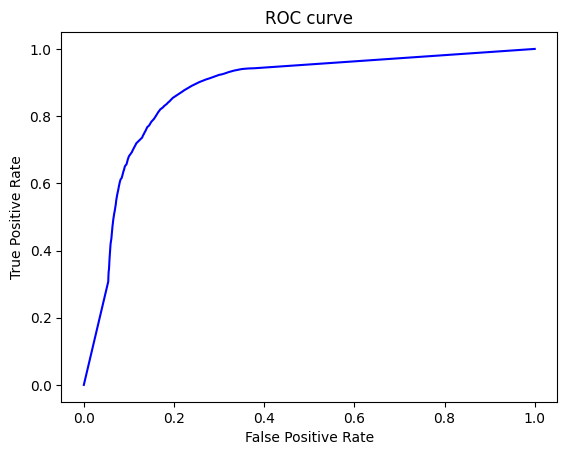

In [ ]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

train, test, target, target_test = train_test_split(X_resampled, y_resampled, test_size = 0.7, random_state = 30)



dTree_clf = DecisionTreeClassifier(max_depth=20, min_samples_leaf=4, criterion='entropy', random_state=30)



dTree_clf.fit(train,target)

pred = dTree_clf.predict(test)
dTree_score = dTree_clf.predict_proba(test)[:,1]

print('Accuracy of XGBoost on test set: {:.2f}'.format(dTree_clf.score(test, target_test)))
print_4_metrics(target_test, pred)
roc(target_test, dTree_score)

### MLP classifier (Neural Network)

In [ ]:
from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(solver='lbfgs', alpha=1e-2, hidden_layer_sizes=(5, 2), random_state=1)
mlp = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=(10, 5), max_iter=1000, random_state=1, activation='logistic')
mlp.fit(train, target)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 5), max_iter=1000,
              random_state=1)

Accuracy of MLP on test set: 0.82
Accuracy:    0.822075
Precision:   0.814444
Recall:      0.834467
F1 Score:    0.824334
Performance Results:

AUC of ROC:  0.901140268999179


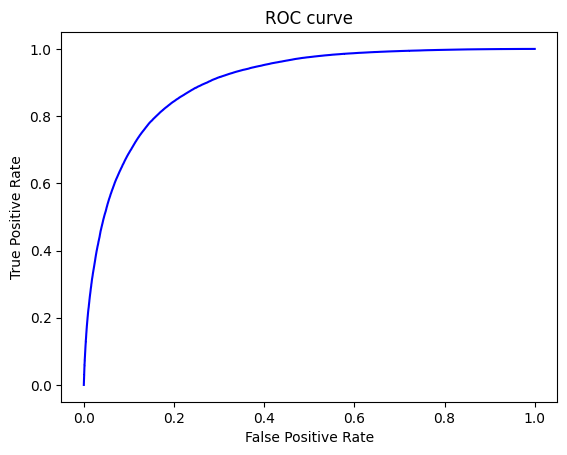

In [ ]:
preds = mlp.predict(test)
nn_score = mlp.predict_proba(test)[:,1]

print('Accuracy of MLP on test set: {:.2f}'.format(mlp.score(test, target_test)))
print_4_metrics(target_test, preds)

roc(target_test, nn_score)

### KNeighborsClassifier(KNN)

Accuracy of KNN on test set: 0.87
Accuracy:    0.871237
Precision:   0.836113
Recall:      0.923668
F1 Score:    0.877712
Performance Results:

AUC of ROC:  0.89061434107692


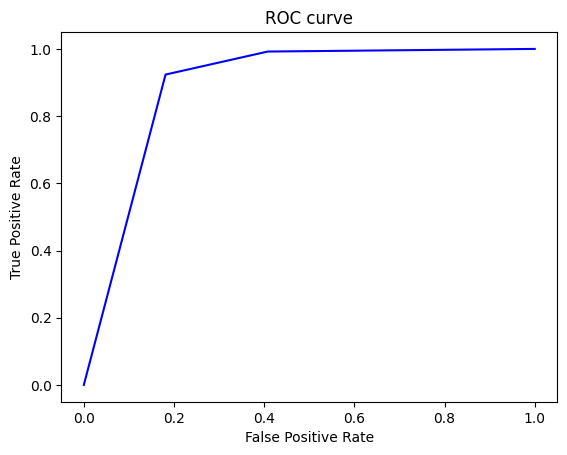

In [ ]:
results = KNeighborsClassifier(n_neighbors=2)
results.fit(train, target)
preds = results.predict(test)
KNN_score = results.predict_proba(test)[:,1]

print('Accuracy of KNN on test set: {:.2f}'.format(results.score(test, target_test)))
print_4_metrics(target_test, preds)

roc(target_test, KNN_score)
